### Dataset

Use Movielens dataset 100k movie ratings from 943 users and 1682 movies

In [1]:
import numpy as np
import math
import pandas as pd
import time

In [2]:
# Reading users file:
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=user_cols, encoding='latin-1')

In [3]:
# Reading ratings file:
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=rating_cols, encoding='latin-1')

In [4]:
# Reading items file
item_cols = ['movie_id', 'movie title', 'release data', 'video release date', 'IMDB URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drame', 'Fantasy', 'Film-Noir', 'Horror',
         'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('../data/ml-100k/u.item', sep='|', names=item_cols, encoding='latin-1')

In [5]:
print("Kich thuoc bang users: ", (users.shape))
print("In 5 phan tu dau tien bang users: ", users.head())

Kich thuoc bang users:  (943, 5)
In 5 phan tu dau tien bang users:     user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


In [6]:
print("Kich thuoc bang ratings: ", (ratings.shape))
print("In 5 phan tu dau tien bang ratings: ", (ratings.head()))

Kich thuoc bang ratings:  (100000, 4)
In 5 phan tu dau tien bang ratings:     user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


In [7]:
print("Kich thuoc bang items: ", (items.shape))
print("In 5 phan tu dau tien bang items: ", items.head())

Kich thuoc bang items:  (1682, 24)
In 5 phan tu dau tien bang items:     movie_id        movie title release data  video release date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDB URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's   ...     Fantasy  Film-Noir  Horror  \
0          0

In [8]:
# dem so user va so item
n_users = users.user_id.unique().shape[0]
n_items = items.movie_id.unique().shape[0]
print("So user la: ", (n_users))
print("So bo phim la: ", (n_items))

So user la:  943
So bo phim la:  1682


In [9]:
# Bộ dữ liệu đã chia Movielen 100k đã chia săn thành 5 bộ dữ liệu trai-test 

# u1.base    -- The data sets u1.base and u1.test through u5.base and u5.test
# u1.test       are 80%/20% splits of the u data into training and test data.
# u2.base       Each of u1, ..., u5 have disjoint test sets; this if for
# u2.test       5 fold cross validation (where you repeat your experiment
# u3.base       with each training and test set and average the results).
# u3.test       These data sets can be generated from u.data by mku.sh.
# u4.base
# u4.test
# u5.base
# u5.test

In [10]:
train_u1 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u1.base', sep='\t', names=rating_cols, encoding='latin-1')
train_u2 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u2.base', sep='\t', names=rating_cols, encoding='latin-1')
train_u3 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u3.base', sep='\t', names=rating_cols, encoding='latin-1')
train_u4 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u4.base', sep='\t', names=rating_cols, encoding='latin-1')
train_u5 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u5.base', sep='\t', names=rating_cols, encoding='latin-1')

In [11]:
test_u1 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u1.test', sep='\t', names=rating_cols, encoding='latin-1')
test_u2 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u2.test', sep='\t', names=rating_cols, encoding='latin-1')
test_u3 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u3.test', sep='\t', names=rating_cols, encoding='latin-1')
test_u4 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u4.test', sep='\t', names=rating_cols, encoding='latin-1')
test_u5 = pd.read_csv('/home/damvantai/Documents/data/MovieLens/ml-100k/u5.test', sep='\t', names=rating_cols, encoding='latin-1')

### Thực thi hệ thống lọc cộng tác dựa trên bộ nhớ sử dụng tính toán độ tương đồng cosine

#### 1. Độ tương tự giữa các item trong lọc công tác dựa trên item-item được đo bằng đánh giá của tất cả users đã đánh giá cả hai items.

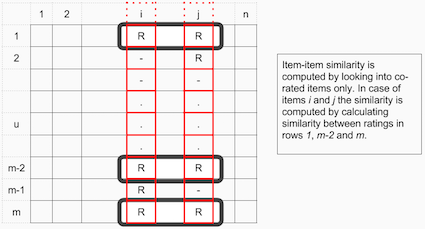

In [12]:
from IPython.display import Image
Image("item-item.png")

#### 2. Còn độ tương tự trong hệ thống lọc cộng tác user-user giữa các user được đo bằng đánh giá trên các items của cả hai người sử dụng

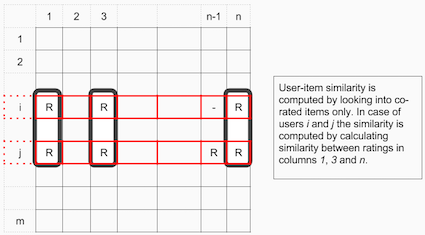

In [13]:
from IPython.display import Image
Image("user-user.png")

### create matrix user-item rating

In [14]:
# tạo ma trận user-item, một cho training và một cho testing cho bo du lieu 1
train_matrix_u1 = np.zeros((n_users, n_items))
for line in train_u1.itertuples():
    # line[1]: user_id
    # line[2]: movie_id
    # line[3]: rating
    train_matrix_u1[line[1]-1, line[2]-1] = line[3]
    
test_matrix_u1 = np.zeros((n_users, n_items))
for line in test_u1.itertuples():
    test_matrix_u1[line[1]-1, line[2]-1] = line[3]

In [15]:
# tạo ma trận user-item, một cho training và một cho testing cho bo du lieu 2
train_matrix_u2 = np.zeros((n_users, n_items))
for line in train_u2.itertuples():
    # line[1]: user_id
    # line[2]: movie_id
    # line[3]: rating
    train_matrix_u2[line[1]-1, line[2]-1] = line[3]
    
test_matrix_u2 = np.zeros((n_users, n_items))
for line in test_u2.itertuples():
    test_matrix_u2[line[1]-1, line[2]-1] = line[3]

# tạo ma trận user-item, một cho training và một cho testing cho bo du lieu 3
train_matrix_u3 = np.zeros((n_users, n_items))
for line in train_u3.itertuples():
    # line[1]: user_id
    # line[2]: movie_id
    # line[3]: rating
    train_matrix_u3[line[1]-1, line[2]-1] = line[3]
    
test_matrix_u3 = np.zeros((n_users, n_items))
for line in test_u3.itertuples():
    test_matrix_u3[line[1]-1, line[2]-1] = line[3]

# tạo ma trận user-item, một cho training và một cho testing cho bo du lieu 4
train_matrix_u4 = np.zeros((n_users, n_items))
for line in train_u4.itertuples():
    # line[1]: user_id
    # line[2]: movie_id
    # line[3]: rating
    train_matrix_u4[line[1]-1, line[2]-1] = line[3]
    
test_matrix_u4 = np.zeros((n_users, n_items))
for line in test_u4.itertuples():
    test_matrix_u4[line[1]-1, line[2]-1] = line[3]

# tạo ma trận user-item, một cho training và một cho testing cho bo du lieu 1
train_matrix_u5 = np.zeros((n_users, n_items))
for line in train_u5.itertuples():
    # line[1]: user_id
    # line[2]: movie_id
    # line[3]: rating
    train_matrix_u5[line[1]-1, line[2]-1] = line[3]
    
test_matrix_u5 = np.zeros((n_users, n_items))
for line in test_u5.itertuples():
    test_matrix_u5[line[1]-1, line[2]-1] = line[3]


### Prediction and evaluate

Build matrix 

In [16]:
# User function pairwise_distance calculate simarility item-item and user-user
from sklearn.metrics.pairwise import pairwise_distances

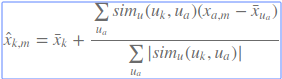

In [16]:
Image("user-user-s.png")

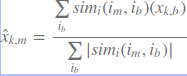

In [17]:
Image("item-item-s.png")

In [18]:
# from IPython.core.interactiveshell import InteractiveShell
# # InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

# np.set_printoptions(threshold=np.nan)

### Function predict to calculate matrix pred

In [27]:
def predict(ratings, category, metric):
    
    # user-user matrix similarity
    if category == 'user':
        
        # Calculate matrix rating mean for user mean-user for rating item
        mean_rating = np.zeros([943, 1])
        for i in range(ratings.shape[0]):
            sum = 0
            num_elements = 0
            for j in range(ratings.shape[1]):
                if ratings[i][j] != 0:
                    sum = sum + ratings[i][j]
                    num_elements = num_elements + 1
            mean_rating[i] = float(sum) / num_elements
        
        # Create matrix filled with mean rating from above
        train_matrix_ratings_filled = np.array(ratings, copy=True)
        for i in range(ratings.shape[0]):
            for j in range(ratings.shape[1]):
                if train_matrix_ratings_filled[i][j] == 0:
                    train_matrix_ratings_filled[i][j] = mean_rating[i]
                           
        # Create matrix rating difference for matrix train filled and mean rating
        rating_diff = train_matrix_ratings_filled - mean_rating
        
        # Metric similarity cosine or correlation
        if metric == 'cosine':
            similarity = 1 - pairwise_distances(rating_diff, metric='cosine')
        elif metric == 'correlation':
            similarity = 1 - pairwise_distances(rating_diff, metric='correlation')
        
        # Initialization matrix predict 
        pred = np.zeros([n_users, n_items])
        
        # Calculate even element of matrix predict 
        # if rate of element identify, element predict unchange
        # else select 100 user similarity with user present and rating_diff != 0
        for i in range(n_users):
            for j in range(n_items):
                if ratings[i][j] != 0:
                    pred[i][j] = ratings[i][j]
                else:
#                     index_array_similarity_best = similarity[i].argsort()[-100:-1]
                    index_array_similarity_best = [user for user in similarity[i].argsort()[-100:-1] if rating_diff[user][j] != 0]
                    if (np.sum(similarity[i][index_array_similarity_best]) == 0):
#                         index_item_similary_best = [user for user in similarity[0].argsort()[-1000:-1] if rating_diff[user][111] != 0]
#                         pred[i][j] = np.sum(train_matrix_u1_filled.T[j])/n_items
                        # tinh rating cua item theo rating trung binh cua cac nguoi su dungj trong bang train cho item
#                         index_user_rating_item = np.nonzero(train_matrix_u1.[i])
#                         pred[i][j] = np.sum(train_matrix_u1[i][index_user_rating_item]) / np.shape(index_user_rating_item)[1]
                        pred[i][j] = mean_rating[i]
                        continue
                    pred[i][j] = similarity[i][index_array_similarity_best].dot(train_matrix_ratings_filled.T[j][index_array_similarity_best]) / np.sum(similarity[i][index_array_similarity_best])
            
        return pred

    # item-item similarity matrix
    elif category == 'item':
        
        # Initialization matrix mean for item mean for user
        mean_rating = np.zeros([1682, 1])
        
        # Create matrix item mean rating
        # except case a item don't have rate of user, default mean_rating of item equal 3
        for i in range(train_matrix_u1.T.shape[0]):
            sum = 0
            num_elements = 0
            for j in range(train_matrix_u1.T.shape[1]):
                if train_matrix_u1.T[i][j] != 0:
                    sum = sum + train_matrix_u1.T[i][j]
                    num_elements = num_elements + 1
            try:
                mean_rating[i] = float(sum) / num_elements
            except ZeroDivisionError:
                mean_rating[i] = 3
                
        # Calculate train matrix rating filled 
        train_matrix_ratings_filled = np.array(train_matrix_u1.T, copy=True)
        for i in range(train_matrix_u1.T.shape[0]):
            for j in range(train_matrix_u1.T.shape[1]):
                if train_matrix_ratings_filled[i][j] == 0:
                    train_matrix_ratings_filled[i][j] = mean_rating[i]

        # matran rating difference
        rating_diff = train_matrix_ratings_filled - mean_rating
        if metric == 'cosine':
            item_similarity = 1 - pairwise_distances(rating_diff, metric='cosine')
        elif metric == 'correlation':
            item_similarity = 1 - pairwise_distances(rating_diff, metric='correlation')
        #         rating_diff = np.zeros([943, 1682])

        # Initialization matrix pred for item-item
        pred = np.zeros([n_items, n_users])

        # tinh toan ma tran pred theo cong thuc 
        for i in range(n_items):
            for j in range(n_users):
                if train_matrix_u1.T[i][j] != 0:
                    pred[i][j] = train_matrix_u1.T[i][j]
                else:
                    index_array_similarity_best = [user for user in item_similarity[i].argsort()[-100:-1] if rating_diff[user][j] != 0]
                    if (np.sum(item_similarity[i][index_array_similarity_best]) == 0):
                        pred[i][j] = mean_rating[i]
                        continue
                    pred[i][j] = item_similarity[i][index_array_similarity_best].dot(train_matrix_ratings_filled.T[j][index_array_similarity_best]) / np.sum(item_similarity[i][index_array_similarity_best])
    return pred.T

### Create list matrix train and test

In [28]:
train_list = [train_matrix_u1, train_matrix_u2, train_matrix_u3, train_matrix_u4, train_matrix_u5]

In [29]:
test_list = [test_matrix_u1, test_matrix_u2, test_matrix_u3, test_matrix_u4, test_matrix_u5]

In [41]:
MAE_item = np.zeros(5)
MAE_user = np.zeros(5)
RMSE_user = np.zeros(5)
RMSE_item = np.zeros(5)
RMSE_user_correlation = np.zeros(5)
RMSE_item_correlation = np.zeros(5)

### Function calculator error RMSE and MAE for element of matrix test

In [42]:
from sklearn.metrics.pairwise import pairwise_distances

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(predict, actual):
    predict = predict[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(predict, actual))

In [44]:
from sklearn.metrics import mean_absolute_error
def mae(predict, actual):
    predict = predict[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return (mean_absolute_error(predict, actual))

### Test user similarity cosine

In [45]:
# Want show full matrix numpy in ipython notebook

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# # InteractiveShell.ast_node_interactivity = "last_expr"
# np.set_printoptions(threshold=np.nan)

### Run all train and test 

In [46]:
# matrix prediction user-user with similarity cosine
user_prediction = np.zeros([5, 943, 1682])

# matrix prediction item-item with similarity cosine
item_prediction = np.zeros([5, 943, 1682])

# matrix prediction item-item with similarity correlation
user_prediction_correlation = np.zeros([5, 943, 1682])

In [47]:
for i, matrix in enumerate(train_list):
    user_prediction[i] = predict(matrix, category='user', metric='cosine')
    item_prediction[i] = predict(matrix, category='item', metric='cosine')
    
#     print(user_prediction)

    user_prediction_correlation[i] = predict(matrix, category='user', metric='correlation')
#     item_prediction_correlation = predict(matrix, item_similarity_correlation, type='item')
    
    MAE_item[i] = mae(item_prediction[i], test_list[i])
    MAE_user[i] = mae(user_prediction[i], test_list[i])
    RMSE_item[i] = rmse(item_prediction[i], test_list[i])
    RMSE_user[i] = rmse(user_prediction[i], test_list[i])
    
#     RMAE_item_correlation[i] = rmse(item_prediction_correlation, test_list[i])
    RMSE_user_correlation[i] = rmse(user_prediction_correlation[i], test_list[i])
    print(repr(i + 1).rjust(5), repr(MAE_item[i]).rjust(5), repr(MAE_user[i]).rjust(5), repr(RMSE_item[i]).rjust(5), repr(RMSE_user[i]).rjust(5), repr(RMSE_user_correlation[i]).rjust(5))
    print()
    

    1 0.79009779692157223 0.81416692777072541 1.0165458308483377 1.025932281021944 1.025932281021944

    2   0.0 0.80644106435127183   0.0 1.0194260720767372 1.0194260720767372



KeyboardInterrupt: 

In [ ]:
print("MAE trung binh cua loc cong tac tren user: ", np.mean(MAE_user))
print("MAE trung binh cua loc cong tac tren item: ", np.mean(MAE_item))
print("RMSE trung binh cua loc cong tac tren user: ", np.mean(RMSE_user))
print("RMSE trung binh cua loc cong tac tren item: ", np.mean(RMSE_item))
print("RMSE trung binh cua loc con tac tren user tinh do tuong dong bang correlation: ", np.mean(RMSE_user_correlation))

In [ ]:
print(RMSE_item)

In [ ]:
print(RMSE_user)

### Collaborative based model

#### Approach SVD to find eigenvecto

In [ ]:
Image("svd.png")

In [ ]:
# tính độ thưa
sparsity = round(1.0 - len(ratings)/float(n_users*n_items), 3)
print("level sparise of dataset 100k: " + str(sparsity*100) + "%")

In [ ]:
# Du doan rating su dung SVD

In [ ]:
import scipy.sparse as sp

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
RMSE_user = np.zeros(5)
RMSE_k = np.zeros(20)
test_k = np.linspace(5, 100, 20, dtype=int)
for j, k in enumerate(test_k):
    for i, matrix in enumerate(train_list):
        u, s, vt = svds(matrix, k)
#         print(s.shape)
        s_diag_matrix = np.diag(s)
        X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
        RMSE_user[i] = rmse(X_pred, test_list[i])
    RMSE_k[j] = np.mean(RMSE_user)
    print("User-based CF MSE with k = %d la %s" % (k, np.mean(RMSE_user)))

In [ ]:
import  matplotlib.pyplot as plt

In [ ]:
plt.xlabel("Number of singular values to compute")
plt.ylabel("error")
plt.plot(test_k, RMSE_k)
plt.savefig("svd_error.jpg")
plt.show()

In [ ]:
plt.savefig("svd_error.jpg")